In [3]:
from tensorflow.keras.datasets import mnist

In [4]:
(train_images, train_labels),(test_images, test_labels) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [5]:
print(train_images.shape) ## 트레인 데이터  개수와 크기
print(test_images.shape)  ## test 데이터 개수와 크기

(60000, 28, 28)
(10000, 28, 28)


In [6]:
print(test_images[2])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  38 254
  109   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  87 252
   82   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 135 241
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  45 244 150
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  8

In [8]:
print(type(test_images))
import numpy as np
np.set_printoptions(linewidth=np.inf )
print(test_images[2])

<class 'numpy.ndarray'>
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  38 254 109   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  87 252  82   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 135 241   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  45 244 150   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   

In [9]:
print(type(test_images))
import numpy as np
np.set_printoptions(linewidth=np.inf )

<class 'numpy.ndarray'>


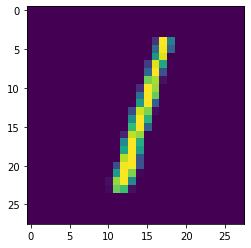

In [10]:
import matplotlib.pyplot as plt
plt.imshow(test_images[2])

In [11]:
print(len(train_labels)) 
print(len(test_labels)) 
print(train_labels) 
print(test_labels) ## 개수와 라벨 확인

60000
10000
[5 0 4 ... 5 6 8]
[7 2 1 ... 4 5 6]


In [12]:
from tensorflow.keras import models
from tensorflow.keras import layers

In [13]:
model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_shape=(28*28,))) ## input_shape = 특성수,샘플의수
model.add(layers.Dense(10, activation='softmax'))  ## 10개의 정보를 출력해야 하기 때문에 10개의 Dense층으로 출력

In [15]:
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', 
metrics=['accuracy'])
# loss: loss function. 훈련 데이터에서 신경망의 성능을 측정하는 손실 함수
# optimizer: 입력된 데이터와 손실 함수를 기반으로 가중치를 업데이트하는 방법
# metrics: 훈련과 테스트 과정을 모니터링할 지표. ‘acc’라고도 씀

In [16]:
train_images = train_images.reshape((60000, 28*28))
train_images = train_images.astype('float32')/255
test_images = test_images.reshape((10000, 28*28))
test_images = test_images.astype('float32')/255

# reshape 함수를 이용해 데이터를 (60000, 784) 크기로 변환하고, 
# 각 값을 255로 나누되, type을 소수점을 받는 float32 형으로 맞춤

In [17]:
from tensorflow.keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)


In [18]:
model.fit(train_images, train_labels, epochs=10, batch_size=128)

Epoch 1/10
469/469 [==============================] - 4s 3ms/step - loss: 0.2911 - accuracy: 0.9184
Epoch 2/10
469/469 [==============================] - 1s 3ms/step - loss: 0.1288 - accuracy: 0.9617
Epoch 3/10
469/469 [==============================] - 2s 3ms/step - loss: 0.0875 - accuracy: 0.9744
Epoch 4/10
469/469 [==============================] - 2s 3ms/step - loss: 0.0651 - accuracy: 0.9807
Epoch 5/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0514 - accuracy: 0.9845
Epoch 6/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0410 - accuracy: 0.9879
Epoch 7/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0336 - accuracy: 0.9904
Epoch 8/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0265 - accuracy: 0.9923
Epoch 9/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0220 - accuracy: 0.9938
Epoch 10/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0178 - accuracy: 0.9951

In [19]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('정확도:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0768 - accuracy: 0.9774
정확도: 0.977400004863739
